<a href="https://colab.research.google.com/github/mounishvatti/machine-learning/blob/main/MNIST_and_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import keras

In [3]:
from keras.datasets import mnist

In [8]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,
          training_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1487 - accuracy: 0.9548 - val_loss: 0.0629 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0509 - val_accuracy: 0.9833
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9903
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0441 - val_accuracy: 0.9856


In [5]:
import matplotlib.pyplot as plt

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

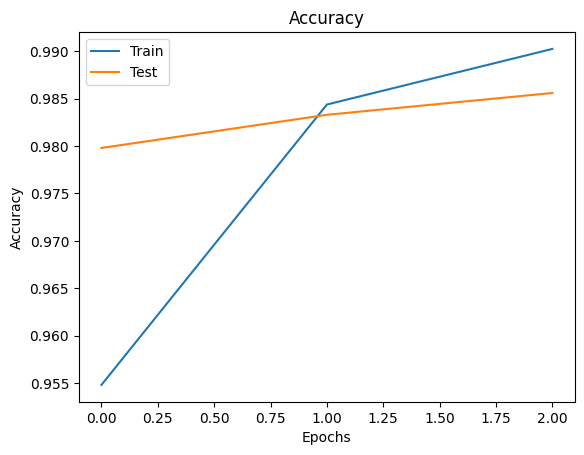

<function matplotlib.pyplot.show(close=None, block=None)>

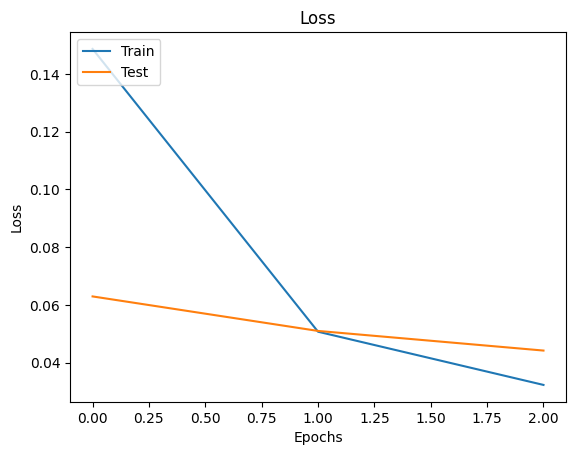

In [9]:
h = model.history.history

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()


plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show